In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
egg_data = pd.read_csv('Data/sentinel_eggs_2023_trial_1.csv')
egg_data

,Site,Management,Location,Type,Trial,Start,End,Weather,Stage
0,AG,Conventional,A,R,1,197,190,Sunny,R-L
1,AG,Conventional,B,R,1,213,201,Sunny,R-L
2,AG,Conventional,C,R,1,216,210,Sunny,R-L
3,AG,Conventional,D,R,1,210,189,Sunny,R-L
4,AG,Conventional,E,R,1,191,180,Sunny,R-L
...,...,...,...,...,...,...,...,...,...
80,WH,Organic,A,R,1,154,126,Sunny,R-E
81,WH,Organic,B,R,1,155,155,Sunny,R-E
82,WH,Organic,C,R,1,241,225,Sunny,R-E
83,WH,Organic,D,R,1,252,224,Sunny,R-E


In [4]:
egg_data['Absolute'] = egg_data['Start'] - egg_data['End']
egg_data

,Site,Management,Location,Type,Trial,Start,End,Weather,Stage,Absolute
0,AG,Conventional,A,R,1,197,190,Sunny,R-L,7
1,AG,Conventional,B,R,1,213,201,Sunny,R-L,12
2,AG,Conventional,C,R,1,216,210,Sunny,R-L,6
3,AG,Conventional,D,R,1,210,189,Sunny,R-L,21
4,AG,Conventional,E,R,1,191,180,Sunny,R-L,11
...,...,...,...,...,...,...,...,...,...,...
80,WH,Organic,A,R,1,154,126,Sunny,R-E,28
81,WH,Organic,B,R,1,155,155,Sunny,R-E,0
82,WH,Organic,C,R,1,241,225,Sunny,R-E,16
83,WH,Organic,D,R,1,252,224,Sunny,R-E,28


In [5]:
egg_data['Proportion'] = (egg_data['Start'] - egg_data['End']) / egg_data['Start']
egg_data


,Site,Management,Location,Type,Trial,Start,End,Weather,Stage,Absolute,Proportion
0,AG,Conventional,A,R,1,197,190,Sunny,R-L,7,0.035533
1,AG,Conventional,B,R,1,213,201,Sunny,R-L,12,0.056338
2,AG,Conventional,C,R,1,216,210,Sunny,R-L,6,0.027778
3,AG,Conventional,D,R,1,210,189,Sunny,R-L,21,0.100000
4,AG,Conventional,E,R,1,191,180,Sunny,R-L,11,0.057592
...,...,...,...,...,...,...,...,...,...,...,...
80,WH,Organic,A,R,1,154,126,Sunny,R-E,28,0.181818
81,WH,Organic,B,R,1,155,155,Sunny,R-E,0,0.000000
82,WH,Organic,C,R,1,241,225,Sunny,R-E,16,0.066390
83,WH,Organic,D,R,1,252,224,Sunny,R-E,28,0.111111


(array([29., 14.,  8.,  8.,  2.,  4.,  2.,  2.,  3.,  3.,  1.,  3.,  0.,
         2.,  0.,  0.,  2.,  0.,  0.,  2.]),
 array([-0.00990099,  0.04059406,  0.09108911,  0.14158416,  0.19207921,
         0.24257426,  0.29306931,  0.34356436,  0.39405941,  0.44455446,
         0.4950495 ,  0.54554455,  0.5960396 ,  0.64653465,  0.6970297 ,
         0.74752475,  0.7980198 ,  0.84851485,  0.8990099 ,  0.94950495,
         1.        ]),
 <BarContainer object of 20 artists>)

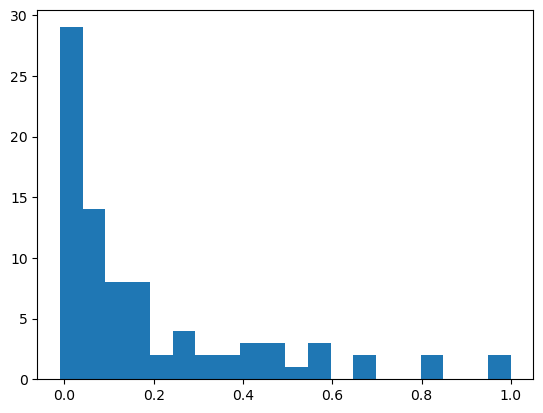

In [6]:
plt.hist(egg_data['Proportion'], bins=20)

In [7]:
organic = egg_data.loc[egg_data['Management'] == 'Organic']
organic

,Site,Management,Location,Type,Trial,Start,End,Weather,Stage,Absolute,Proportion
25,HAR,Organic,A,R,1,288,51,Sunny,V-E,237,0.822917
26,HAR,Organic,B,R,1,248,119,Sunny,V-E,129,0.520161
27,HAR,Organic,C,R,1,250,181,Sunny,V-E,69,0.276000
28,HAR,Organic,D,R,1,224,218,Sunny,V-E,6,0.026786
29,HAR,Organic,E,R,1,286,274,Sunny,V-E,12,0.041958
30,HAT,Organic,A,R,1,142,121,Rainy,R-E,21,0.147887
31,HAT,Organic,B,R,1,195,171,Rainy,R-E,24,0.123077
32,HAT,Organic,C,R,1,228,220,Rainy,R-E,8,0.035088
33,HAT,Organic,D,R,1,200,4,Rainy,R-E,196,0.980000
34,HAT,Organic,E,R,1,215,202,Rainy,R-E,13,0.060465


In [14]:
conventional = egg_data.loc[egg_data['Management'] == 'Conventional']
conventional

,Site,Management,Location,Type,Trial,Start,End,Weather,Stage,Absolute,Proportion
0,AG,Conventional,A,R,1,197,190,Sunny,R-L,7,0.035533
1,AG,Conventional,B,R,1,213,201,Sunny,R-L,12,0.056338
2,AG,Conventional,C,R,1,216,210,Sunny,R-L,6,0.027778
3,AG,Conventional,D,R,1,210,189,Sunny,R-L,21,0.100000
4,AG,Conventional,E,R,1,191,180,Sunny,R-L,11,0.057592
5,CURC,Conventional,A,R,1,171,169,Sunny,R-L,2,0.011696
6,CURC,Conventional,B,R,1,174,147,Sunny,R-L,27,0.155172
7,CURC,Conventional,C,R,1,170,95,Sunny,R-L,75,0.441176
8,CURC,Conventional,D,R,1,235,232,Sunny,R-L,3,0.012766
9,CURC,Conventional,E,R,1,196,189,Sunny,R-L,7,0.035714


<Axes: xlabel='Management'>

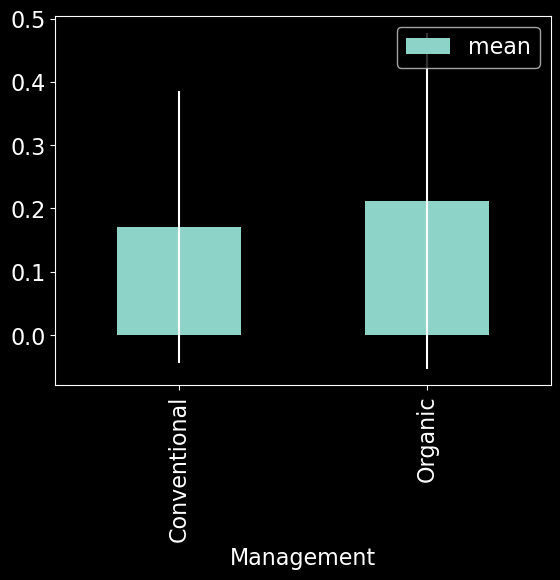

In [23]:
egg_data.groupby(['Management'])['Proportion'].agg(['mean', 'std']).plot.bar(yerr='std')


In [90]:
stats.mannwhitneyu(organic['Proportion'], conventional['Proportion'])

MannwhitneyuResult(statistic=953.0, pvalue=0.6435547842625484)

In [91]:
formula = "Proportion ~ Management + Weather + Stage"
md  = smf.mixedlm(formula, egg_data, groups=egg_data["Site"])
mdf = md.fit()
print(mdf.summary())


             Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   Proportion
No. Observations:     85        Method:               REML      
No. Groups:           17        Scale:                0.0482    
Min. group size:      5         Log-Likelihood:       -2.6308   
Max. group size:      5         Converged:            No        
Mean group size:      5.0                                       
----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept              0.126    0.081  1.551 0.121 -0.033  0.285
Management[T.Organic]  0.107    0.095  1.135 0.256 -0.078  0.293
Weather[T.Sunny]      -0.149    0.088 -1.697 0.090 -0.320  0.023
Stage[T.R-L]           0.130    0.103  1.264 0.206 -0.072  0.331
Stage[T.V-E]           0.248    0.081  3.061 0.002  0.089  0.406
Stage[T.V-L]           0.201    0.141  

/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/statsmodels/base/mode